# Ｒによるデータ分析と可視化

## ライブラリ（tidyverse）の読み込み
```dplyr```を用いたデータ分析と，```ggplot2```を用いたデータの可視化を行うためのライブラリの読み込み

結果からわかるように，以下で利用する```filter()```のみ，conflictが発生している．そのため，```dplyr::filter()```としないといけないことに注意．

In [2]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## データセットの読み込み

### 利用するデータセット（Lahmanデータセット）の準備
Lahmanパッケージをインストールし，読み込むとLahmanデータセットが利用できるようになる．

In [3]:
install.packages("Lahman")
library("Lahman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Lahmanデータセット
Lahmanパッケージに含まれるデータセットの例（データフレーム型）


|  変数（データ）名  |    |
| ---- | ---- |
|  People  | プレイヤーに関するデータ  |
|  Batting | シーズンの打撃成績 |
|  Fielding | シーズンの守備成績 |
|  Pitching | シーズンの投球成績 |
|  Salaries | プレイヤーの各シーズンの年俸 |
|  Teams | シーズンごとのチーム成績 |

上記以外のデータや，データセットの詳細については，以下を参照のこと．

http://www.seanlahman.com/baseball-archive/statistics/

http://www.seanlahman.com/files/database/readme2017.txt

例えば，Peopleデータセットを表示すると

In [4]:
head(People)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,⋯,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<date>,<date>
1,aardsda01,1981,12,27,USA,CO,Denver,NA,NA,NA,⋯,215,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,NA,1981-12-27
2,aaronha01,1934,2,5,USA,AL,Mobile,2021,1,22,⋯,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,2021-01-22,1934-02-05
3,aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,⋯,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1984-08-16,1939-08-05
4,aasedo01,1954,9,8,USA,CA,Orange,NA,NA,NA,⋯,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NA,1954-09-08
5,abadan01,1972,8,25,USA,FL,Palm Beach,NA,NA,NA,⋯,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01,NA,1972-08-25
6,abadfe01,1985,12,17,D.R.,La Romana,La Romana,NA,NA,NA,⋯,235,74,L,L,2010-07-28,2019-09-28,abadf001,abadfe01,NA,1985-12-17


```str()```とすると，構造（列の名前，型の一覧）が表示される．

In [ ]:
str(People)

'data.frame':	20093 obs. of  26 variables:
 $ playerID    : chr  "aardsda01" "aaronha01" "aaronto01" "aasedo01" ...
 $ birthYear   : int  1981 1934 1939 1954 1972 1985 1850 1877 1869 1866 ...
 $ birthMonth  : int  12 2 8 9 8 12 11 4 11 10 ...
 $ birthDay    : int  27 5 5 8 25 17 4 15 11 14 ...
 $ birthCountry: chr  "USA" "USA" "USA" "USA" ...
 $ birthState  : chr  "CO" "AL" "AL" "CA" ...
 $ birthCity   : chr  "Denver" "Mobile" "Mobile" "Orange" ...
 $ deathYear   : int  NA 2021 1984 NA NA NA 1905 1957 1962 1926 ...
 $ deathMonth  : int  NA 1 8 NA NA NA 5 1 6 4 ...
 $ deathDay    : int  NA 22 16 NA NA NA 17 6 11 27 ...
 $ deathCountry: chr  NA "USA" "USA" NA ...
 $ deathState  : chr  NA "GA" "GA" NA ...
 $ deathCity   : chr  NA "Atlanta" "Atlanta" NA ...
 $ nameFirst   : chr  "David" "Hank" "Tommie" "Don" ...
 $ nameLast    : chr  "Aardsma" "Aaron" "Aaron" "Aase" ...
 $ nameGiven   : chr  "David Allan" "Henry Louis" "Tommie Lee" "Donald William" ...
 $ weight      : int  215 180 190 190

## データ操作の例
ここでは，以下の```dplyr```の関数を紹介するが，これ以外にも様々なデータ操作用の関数が用意されている．

*   ```select```関数: 列番号・列名での列の選択
*   ```slice```関数: 行番号での行の選択
*   ```filter```関数: 条件に応じた行の選択（関数名のコンフリクトのため```dplyr::filter()```として利用）
*   ```summarise```関数，```group_by```関数: グループごとの集計に利用



### 行の選択（行番号の場合）
```People```データセットの1-3行目を選択する．

In [15]:
slice(People, 1:3)

playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,⋯,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<date>,<date>
aardsda01,1981,12,27,USA,CO,Denver,NA,NA,NA,⋯,215,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,NA,1981-12-27
aaronha01,1934,2,5,USA,AL,Mobile,2021,1,22,⋯,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,2021-01-22,1934-02-05
aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,⋯,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1984-08-16,1939-08-05


### パイプ演算子```%>%```
データ処理においては，複数の処理を順番に行うことが多く，そういった場合にはパイプ演算子```%>%```を用いて処理を行う方が便利である．

パイプ演算子を用いることで，上で述べた行の取り出しは，以下のように書くこともできる．パイプ演算子```%>%```の意味は，結果をパイプ後の関数の第１引数に渡すという意味である（linuxのパイプと同じ）．


In [16]:
People %>% slice(1:3)

playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,⋯,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<date>,<date>
aardsda01,1981,12,27,USA,CO,Denver,NA,NA,NA,⋯,215,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,NA,1981-12-27
aaronha01,1934,2,5,USA,AL,Mobile,2021,1,22,⋯,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,2021-01-22,1934-02-05
aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,⋯,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1984-08-16,1939-08-05


### 行・列の選択（行・列番号の場合）
```People```データセットの1-3行目，1-5列目を選択する．

In [14]:
People %>% slice(1:3) %>% select(1:5)

playerID,birthYear,birthMonth,birthDay,birthCountry
<chr>,<int>,<int>,<int>,<chr>
aardsda01,1981,12,27,USA
aaronha01,1934,2,5,USA
aaronto01,1939,8,5,USA


### 行・列の選択（列名の場合）
列の取り出しは列名でも行うことができる．

In [12]:
People %>% slice(1:3) %>% select(playerID, birthMonth, birthDay)

playerID,birthMonth,birthDay
<chr>,<int>,<int>
aardsda01,12,27
aaronha01,2,5
aaronto01,8,5


### 条件による行の選択
Peopleデータセットから，nameLastが"Suzuki"の行（プレイヤー）を抽出する．

In [7]:
People %>% dplyr::filter(nameLast == "Suzuki")

playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,⋯,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<date>,<date>
suzukic01,1973,10,22,Japan,Aichi,Nichi Kasugai-gun,NA,NA,NA,⋯,175,71,L,R,2001-04-02,2019-03-21,suzui001,suzukic01,NA,1973-10-22
suzukku01,1983,10,4,USA,HI,Wailuku,NA,NA,NA,⋯,210,71,R,R,2007-06-12,2020-09-26,suzuk001,suzukku01,NA,1983-10-04
suzukma01,1975,5,31,Japan,Hyogo,Kobe,NA,NA,NA,⋯,195,75,R,R,1996-07-07,2002-06-28,suzum001,suzukma01,NA,1975-05-31


条件の指定には様々な形式が利用でき，例えば2000年以降生まれの選手を抽出することもできる．

In [19]:
People %>% dplyr::filter(birthYear >= 2000)

playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,⋯,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<date>,<date>
garcilu04,2000,5,16,USA,NY,New York,NA,NA,NA,⋯,211,74,L,R,2020-08-14,2020-09-27,garcl006,garcilu04,NA,2000-05-16
luciael01,2000,2,15,D.R.,Santo Domingo,Boca Chica,NA,NA,NA,⋯,210,75,R,R,2019-03-31,2019-09-27,lucie001,luciael01,NA,2000-02-15


### データの選択の組み合わせ
ここまでを組み合わせると，Peopleデータセットから，nameLastが"Suzuki"の行（プレイヤー）を抽出し，playerID, nameFirst, nameLastの３つの列を抽出する，といったことが可能となる．

In [ ]:
People %>% dplyr::filter(nameLast == "Suzuki") %>% select(nameFirst, nameLast, playerID)

nameFirst,nameLast,playerID
<chr>,<chr>,<chr>
Ichiro,Suzuki,suzukic01
Kurt,Suzuki,suzukku01
Mac,Suzuki,suzukma01


### 処理結果の代入
イチローの```playerID```が```suzukic01```であることがわかったので，それを用いて，```Batting```データからイチローのデータを抽出してみる．結果を```ichiro_batting```に代入する．以下のどちらでもよい．

In [17]:
Batting %>% dplyr::filter(playerID == "suzukic01") -> ichiro_data
#ichiro_data <- Batting %>% dplyr::filter(playerID == "suzukic01")

結果を変数に代入した場合には結果が表示されない．結果を表示すると，

In [18]:
ichiro_data

playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
suzukic01,2001,1,SEA,AL,157,692,127,242,34,⋯,69,56,14,30,53,10,8,4,4,3
suzukic01,2002,1,SEA,AL,157,647,111,208,27,⋯,51,31,15,68,62,27,5,3,5,8
suzukic01,2003,1,SEA,AL,159,679,111,212,29,⋯,62,34,8,36,69,7,6,3,1,3
suzukic01,2004,1,SEA,AL,161,704,101,262,24,⋯,60,36,11,49,63,19,4,2,3,6
suzukic01,2005,1,SEA,AL,162,679,111,206,21,⋯,68,33,8,48,66,23,4,2,6,5
suzukic01,2006,1,SEA,AL,161,695,110,224,20,⋯,49,45,2,49,71,16,5,1,2,2
suzukic01,2007,1,SEA,AL,161,678,111,238,22,⋯,68,37,8,49,77,13,3,4,2,7
suzukic01,2008,1,SEA,AL,162,686,103,213,20,⋯,42,43,4,51,65,12,5,3,4,8
suzukic01,2009,1,SEA,AL,146,639,88,225,31,⋯,46,26,9,32,71,15,4,2,1,1


## データ集計の例

### データの集計（平均など）
イチローの打撃成績（```ichiro_data```）から，安打数の合計，平均，最大，最小を計算する．ここで，安打数の列名が```H```であることを利用しており，関数内の指定で列名を指定している．

In [27]:
ichiro_data %>% summarise(totalH=sum(H), meanH=mean(H), minH=min(H), maxH=max(H))

totalH,meanH,minH,maxH
<int>,<dbl>,<int>,<int>
3089,154.45,0,262


### グループごとでのデータの集計
```group_by()```を用いることで，ある条件ごとにデータの集計ができる．例えば，イチローの打撃成績（```ichiro_data```）から，在籍チーム（```teamID```）ごとに安打数の合計，平均，最小，最大を計算する．

```group_by()```を用いて，グループ化してから```summarise()を行えばよい（結果を```ichiro_team_summary```に代入しておく）．


In [53]:
ichiro_data %>% group_by(teamID) %>% summarise(totalH=sum(H), meanH=mean(H), minH=min(H), maxH=max(H)) -> ichiro_team_summary
ichiro_team_summary

teamID,totalH,meanH,minH,maxH
<fct>,<int>,<dbl>,<int>,<int>
MIA,236,78.66667,50,95
NYA,311,103.66667,73,136
SEA,2542,181.57143,0,262


安打数順に並び変えて表示するには，```arrange()```関数を利用する．

In [49]:
ichiro_data %>% group_by(teamID) %>% summarise(totalH=sum(H), meanH=mean(H), minH=min(H), maxH=max(H)) %>% arrange(desc(totalH))

## グラフの描画
ggplot2は多機能で様々なグラフを描画できるため，全てを紹介することはできません．

レポートに必要なグラフについては，以下の関連リンクなどで調べてください．

基本的な流れとしては，以下のようなものです．

1. ggplot関数でグラフ描画するデータを指定する（```data=```の部分）
2. どのデータを描画するかを指定する（```mapping=aes()```の部分）
2. ```+``` で続けて，描画するグラフの形式を指定する（```geom_*()```の部分）
3. さらに```+```で続けて，フォントの大きさなどを指定する

（3,4の順は逆でも構いません）


### 散布図
イチローのシーズンごとの安打数を散布図で描画する．
（横軸：年```yearID```, 縦軸：安打数```H```）

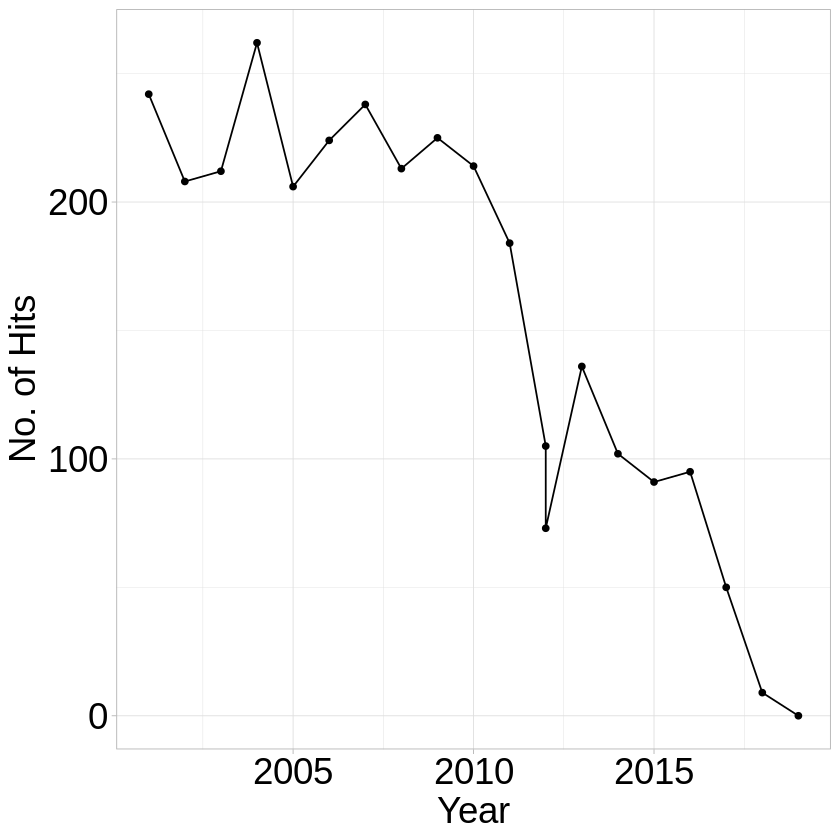

In [71]:
ggplot(data=ichiro_data, mapping=aes(x=yearID, y=H)) +
geom_point() +
geom_line() +
theme_light() +                                                # グラフのテーマの選択
labs(x = "Year",                                               # X軸ラベル
     y = "No. of Hits") +                                      # Y軸ラベル
theme(axis.text.y = element_text(size = 22, colour = "black"), # Y軸の目盛り文字の大きさ
      axis.text.x = element_text(size = 22, colour = "black"), # X軸の目盛り文字の大きさ
      axis.title = element_text(size = 22))                    # 軸の名前の文字の大きさ

縦軸を打率にする
（縦軸を```H（安打数）/AB（打数）```に変更．列名で式を書くこともできる）．

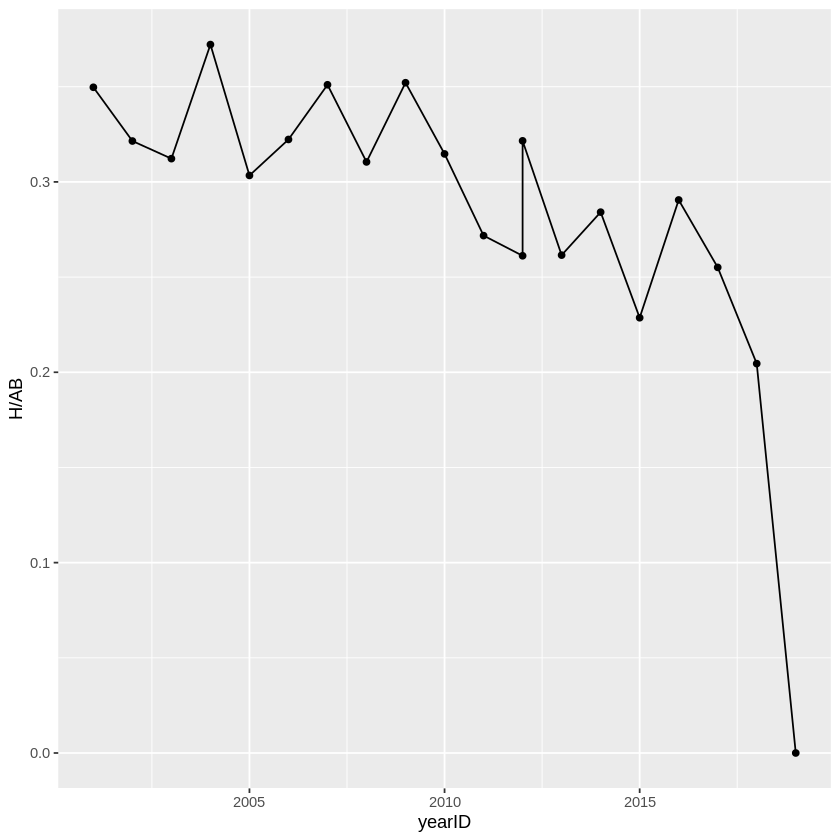

In [61]:
ggplot(data=ichiro_data, mapping=aes(x=yearID, y=H/AB)) +
geom_point() +
geom_line()

また，この例では意味がないが，回帰直線（と信頼区間）を書くこともできる．

`geom_smooth()` using formula 'y ~ x'



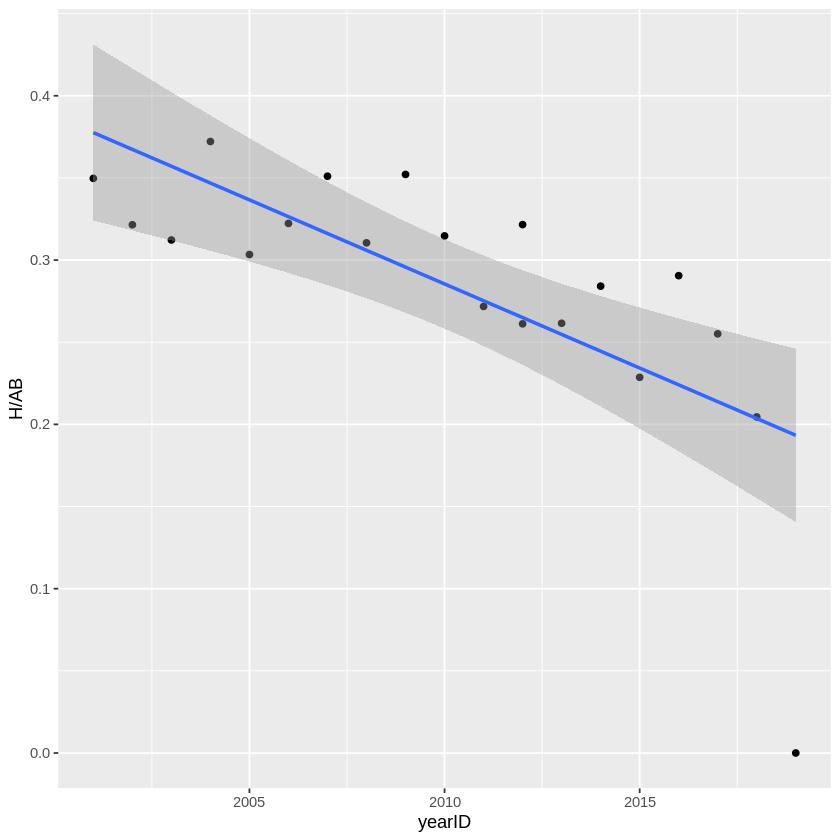

In [98]:
ggplot(data=ichiro_data, mapping=aes(x=yearID, y=H/AB)) +
geom_point() +
geom_smooth(method = "lm", se=TRUE)

### 棒グラフ
イチローのシーズンごとの安打数を棒グラフで描画する．
（横軸：年```yearID```, 縦軸：安打数```H```）

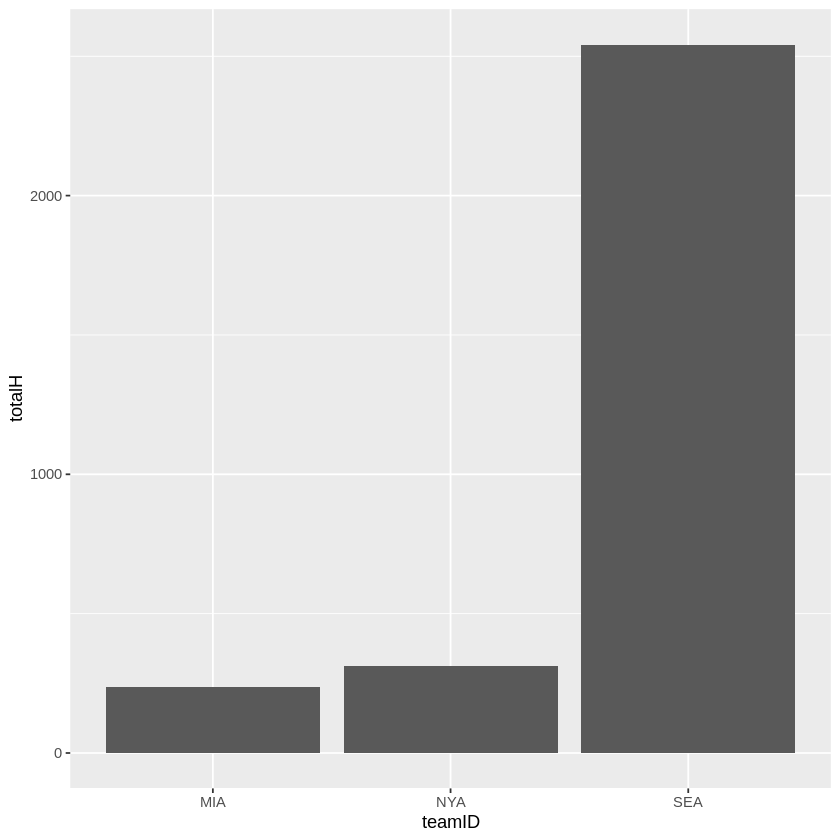

In [62]:
ggplot(data=ichiro_team_summary, mapping=aes(x=teamID,y=totalH)) +
geom_bar(stat = "identity")

以下のようにすると，```teamID```ごとに色を変更できる．

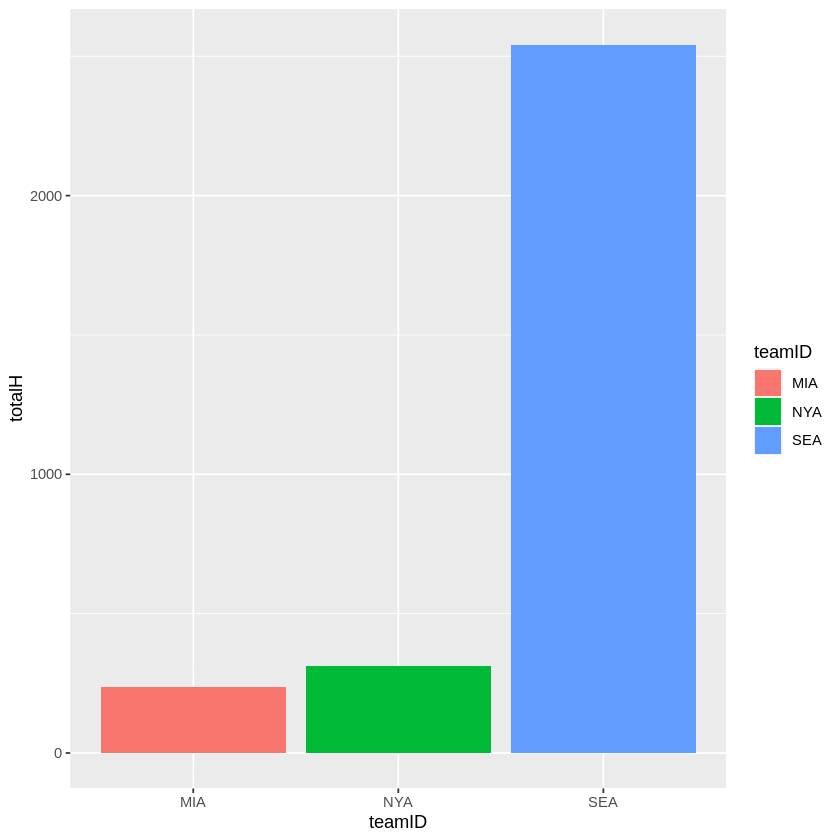

In [63]:
ggplot(data=ichiro_team_summary, mapping=aes(x=teamID,y=totalH,fill=teamID)) +
geom_bar(stat = "identity")

### ヒストグラム
2016年シーズンの年俸のヒストグラムを描画する．

まず，2016年のプレイヤーの年俸データを抽出する．

In [57]:
salaries2016 <- Salaries %>% dplyr::filter(yearID==2016)
head(salaries2016)

,yearID,teamID,lgID,playerID,salary
,<int>,<fct>,<fct>,<chr>,<int>
1,2016,ARI,NL,ahmedni01,521600
2,2016,ARI,NL,barreja01,507500
3,2016,ARI,NL,brachsi01,509300
4,2016,ARI,NL,britoso01,508500
5,2016,ARI,NL,castiwe01,3700000
6,2016,ARI,NL,chafian01,519700


ヒストグラムを描画する．
ここでは，X軸・Y軸のメモリ・ラベルのフォントサイズも変更（大きく）している．

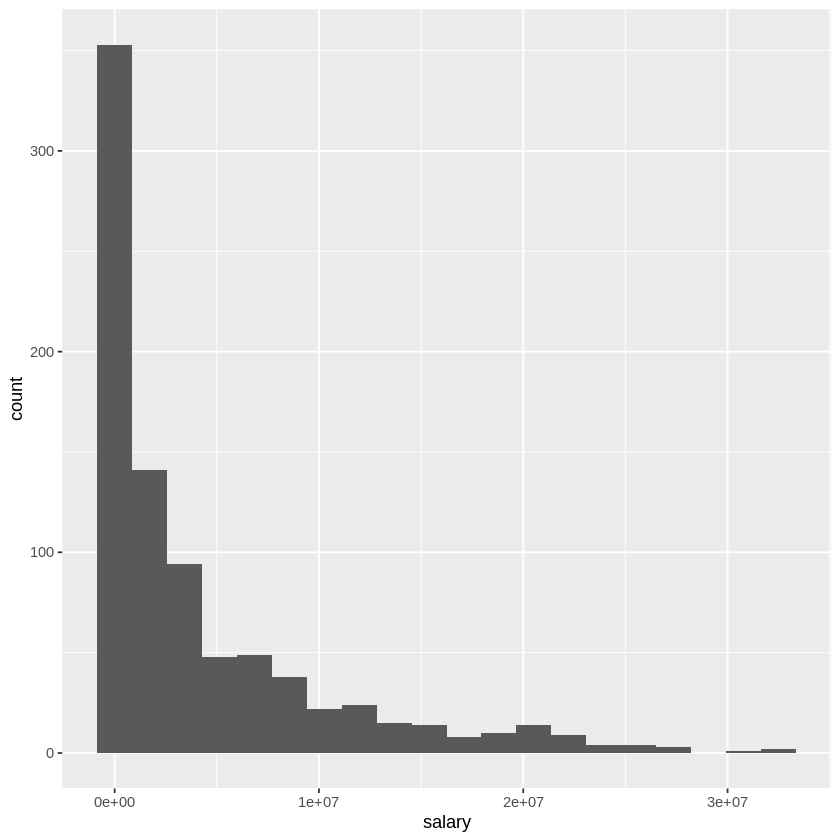

In [64]:
ggplot(data=salaries2016, mapping=aes(x=salary)) +
geom_histogram(bins=20)

### 箱ひげ図・バイオリンプロット
データの分布を可視化する際には，箱ひげ図やバイオリンプロットもよく利用される．

2010年以降の年俸の分布を可視化してみる．高額年俸の選手がとても少ないことが分かる．

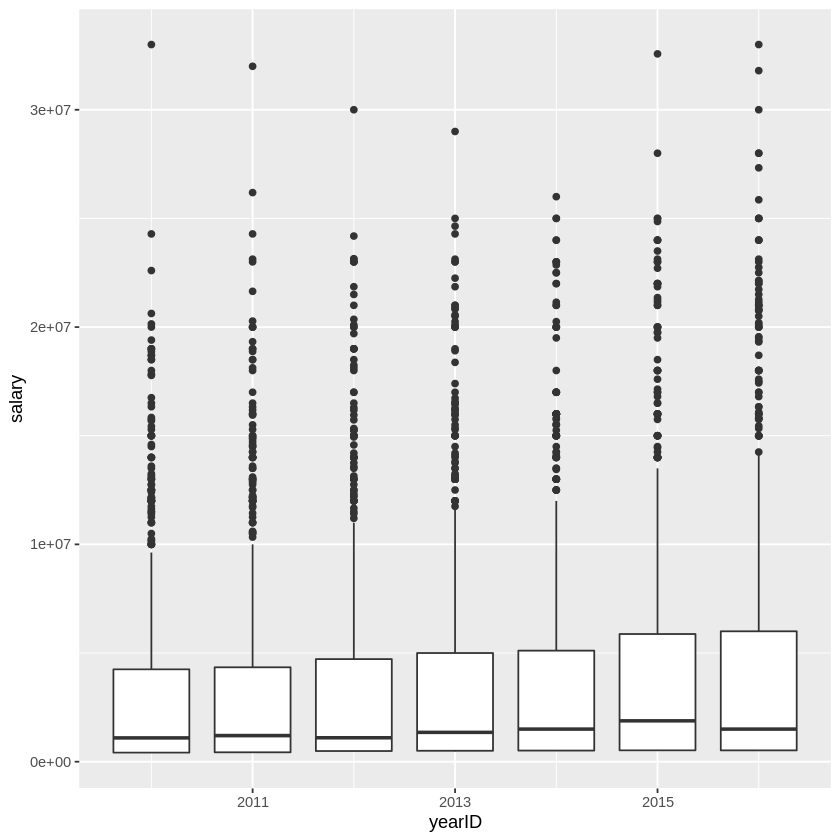

In [108]:
salaries2010 <- Salaries %>% dplyr::filter(yearID>=2010)
ggplot(data=salaries2010, mapping=aes(x=yearID, y=salary, group=yearID)) +
geom_boxplot()

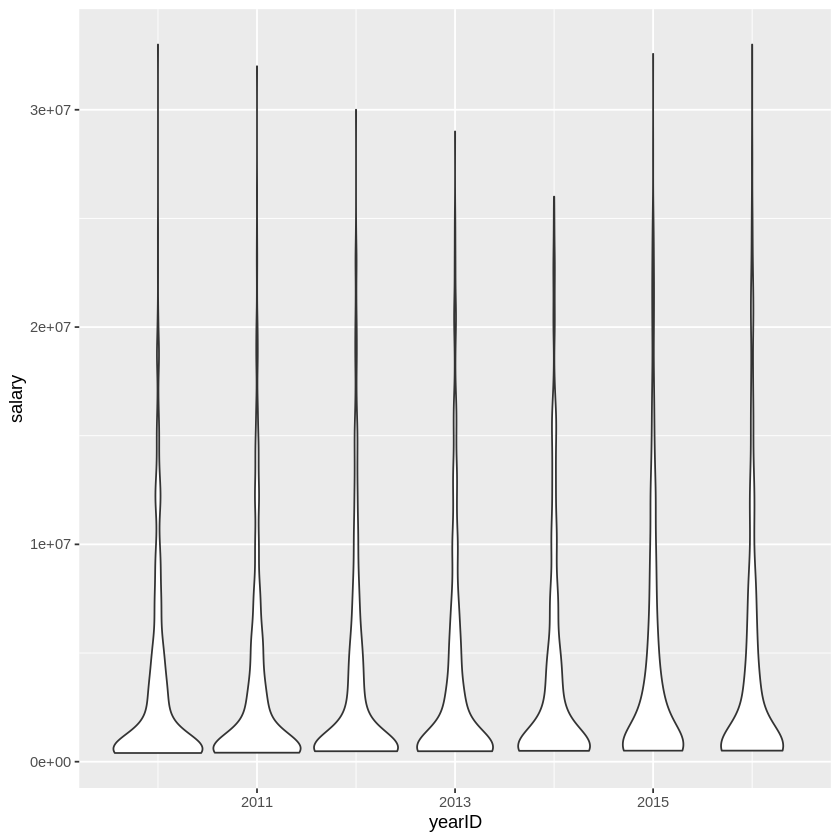

In [110]:
ggplot(data=salaries2010, mapping=aes(x=yearID, y=salary, group=yearID)) +
geom_violin()

## 参考リンク

その他，以下のリンクなども参考にしてください．

dplyr:

https://stats.biopapyrus.jp/r/tidyverse/dplyr.html

https://kazutan.github.io/kazutanR/hands_on_170730/index.html

https://www.jaysong.net/dplyr_intro/


ggplot2:

https://kazutan.github.io/fukuokaR11/intro_ggplot2.html

https://stats.biopapyrus.jp/r/ggplot/


